In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_blobs
import seaborn as sns
from utils import *
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

Gerando amostras para o plot 2D com 2 grupos

In [2]:

X1, Y1 = make_classification(n_features=2, n_samples= 1000, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [3]:
ax = px.scatter(x = X1[:, 0], y = X1[:, 1], height=700, width = 1000, color = make_categorical(Y1), title="Exemplo de Classificação 2D",labels={"color": "Cluster"})
ax.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
ax.show()

Gerando amostras para o plot 3D

In [4]:
X2, Y2 = make_blobs(n_samples = 1000, n_features=3, centers=3)

In [5]:
x = X2[:, 0]
y = X2[:, 1]
z = X2[:, 2]
df = pd.DataFrame({"X": x, "Y": y, "Z": z, "Cluster": make_categorical(Y2)})
df.head()

,X,Y,Z,Cluster
0,8.027481,1.177865,-2.681557,0
1,1.451514,0.623109,0.186441,2
2,-0.783243,-7.960853,4.482872,1
3,2.014835,-10.304627,4.400514,1
4,2.042626,-9.491866,5.438522,1


In [6]:
fig = px.scatter_3d(df, x = 'X', y ='Y', z = 'Z', color = 'Cluster', symbol = 'Cluster',width = 1200, height = 1000, title='Exemplo de Classificação 3D')
fig.update_traces(marker=dict(size=5,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

Gerando amostras com 4 grupos para aplicar o kmeans

In [7]:
X, y = make_blobs(n_samples=2000, centers=4, cluster_std=0.60, random_state=0)

xaxis = X[:,0]
yaxis = X[:,1]

aux_data = pd.DataFrame({"X": xaxis, "Y": yaxis})

km = KMeans(n_clusters=4)


labels = km.fit(aux_data).predict(aux_data)
centers = km.cluster_centers_
data= aux_data.copy()
data["labels"] = make_categorical(labels)


In [8]:
fig = px.scatter(data_frame = data, x = "X", y = "Y", color = "labels",width = 800, height = 600, symbol = "labels", labels = {"labels": "Cluster"})
fig.update_traces(marker=dict(size=5,line=dict(width=0.5,color='DarkSlateGrey')),selector=dict(mode='markers'))

colors = ["Blue", "Red", "Purple", "Green"]
for k in range(len(centers)):
    i = centers[k]
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=i[0]-1.3, y0=i[1]-1.3, x1=i[0]+1.3, y1=i[1]+1.3,
        line_color=colors[k],
    )
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=i[0]-0.1, y0=i[1]-0.1, x1=i[0]+0.1, y1=i[1]+0.1,
        line_color=colors[k],fillcolor = colors[k]
    )
fig.show()

Calculando outliers a partir do Kmeans

In [9]:
#Coletando as distâncias de cada ponto à todos os centroides
X_dist = km.transform(aux_data)

#Coletando a menor das distâncias de cada ponto
dis_min = [min(i) for i in X_dist]

#Normalizando as distâncias
dists = normalize_(dis_min)

#definindo o alpha
alpha = 0.5

#Reclassificando as labels
new_labels = [labels[i] if dists[i] < alpha else "outlier" for i in range(len(dists))]

data2 = aux_data.copy()
data2["out_labels"] = new_labels

In [10]:
fig = px.scatter(data_frame = data2, x = "X", y = "Y", color = "out_labels",width = 800, height = 600, symbol = "out_labels", labels = {"out_labels": "Cluster"})
fig.update_traces(marker=dict(size=5,line=dict(width=0.5,color='DarkSlateGrey')),selector=dict(mode='markers'))

colors = ["Red", "Purple", "Green", "Blue"]
for k in range(len(centers)):
    i = centers[k]
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=i[0]-1.3, y0=i[1]-1.3, x1=i[0]+1.3, y1=i[1]+1.3,
        line_color=colors[k],
    )
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=i[0]-0.1, y0=i[1]-0.1, x1=i[0]+0.1, y1=i[1]+0.1,
        line_color=colors[k],fillcolor = colors[k]
    )
fig.show()

Calculando a inercia do modelo com 1-6 clusters

In [11]:
ine = []
for i in range(1,7):
    km = KMeans(n_clusters=i)
    km.fit(aux_data)
    ine += [km.inertia_]

inertia = normalize_(ine)
inertia
kl = KneeLocator(range(1,7), ine, curve="convex", direction='decreasing', S=2)
fig2 = px.line(x = range(1,7), y = inertia, labels={"y": "Inercia", "x": "Número de Clusters"}, width = 1000, height = 600)
fig2.add_vline(x=kl.knee+1, line_width=1, line_dash="dash", line_color="red")
fig2.show()
inertia
kl.knee

3

Calculando o coeficiente de silhouette com 4 clusters

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


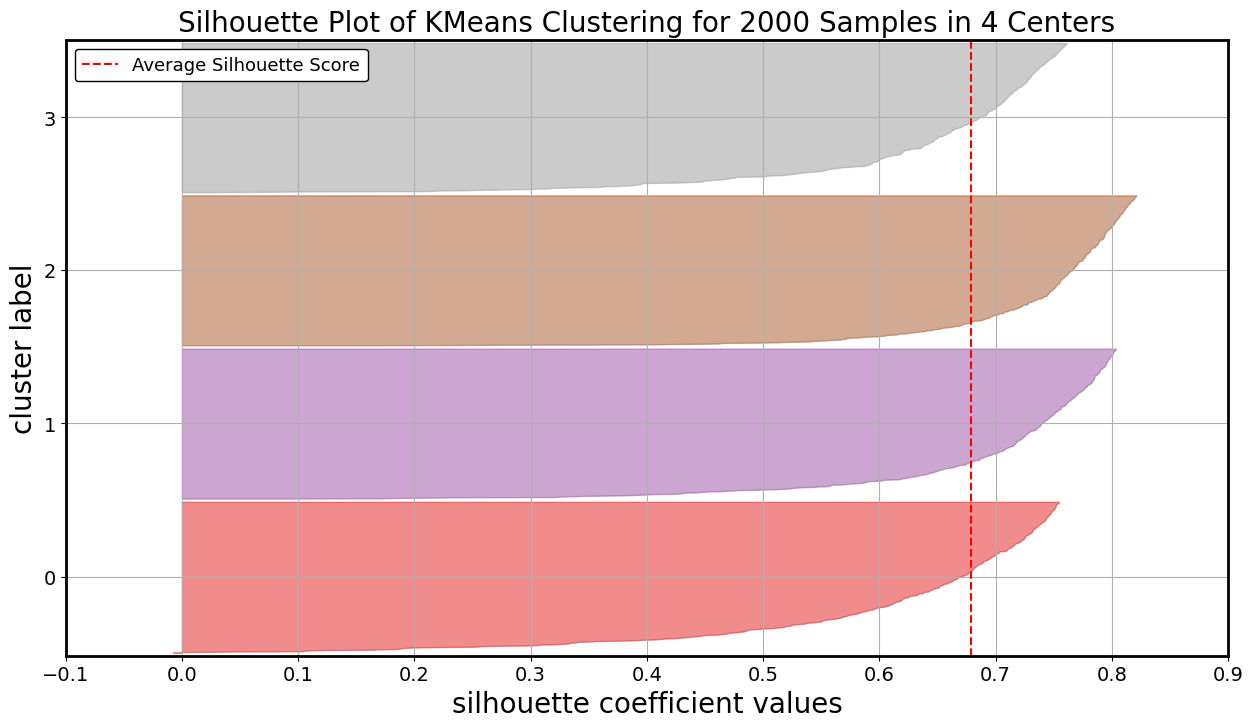

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [12]:
km = KMeans(n_clusters=4)
km.fit(aux_data)
silhouette_visualizer(km, aux_data)

Calculando o coeficiente de silhouette com 6 clusters

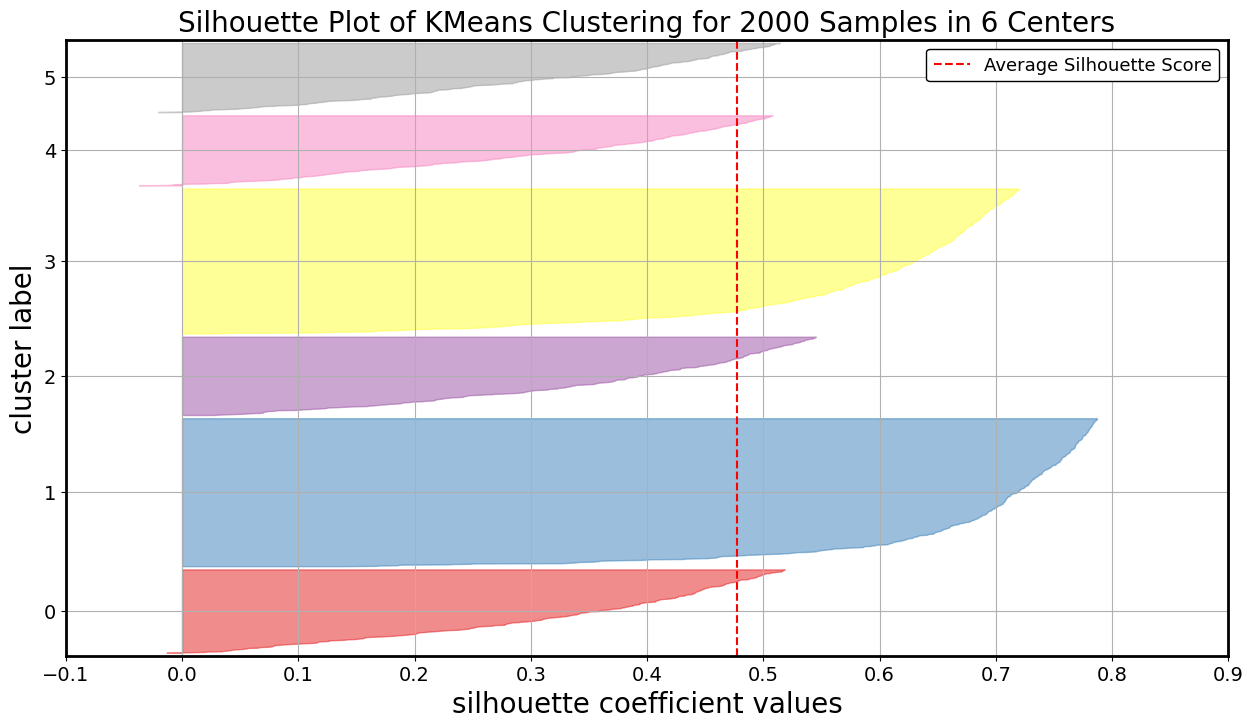

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=6))

In [13]:
km = KMeans(n_clusters=6)
km.fit(aux_data)
silhouette_visualizer(km, aux_data)
